In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

# Import zip

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# we use google colab and store the data in shared drive. different source will have different method
# dont forget to mount drive first
local_zip = '/content/drive/Shareddrives/Capstone C23-PC599/Machine Learning/corndisease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
source_path = '/tmp/jagung'

source_path_bercak = os.path.join(source_path, 'bercak')
source_path_hawar = os.path.join(source_path, 'hawar')
source_path_karat = os.path.join(source_path, 'karat')
source_path_sehat = os.path.join(source_path, 'sehat')


print(f"ada {len(os.listdir(source_path_bercak))} gambar bercak daun.")
print(f"ada {len(os.listdir(source_path_hawar))} gambar hawar daun.")
print(f"ada {len(os.listdir(source_path_karat))} gambar karat daun.")
print(f"ada {len(os.listdir(source_path_sehat))} gambar daun sehat.")


ada 513 gambar bercak daun.
ada 985 gambar hawar daun.
ada 1192 gambar karat daun.
ada 1162 gambar daun sehat.


# Make directory for split training and validation
(can be done manually)

In [5]:
root_dir = '/tmp/corn_disease'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_dir(root_path):
  os.mkdir('/tmp/corn_disease')
  os.mkdir('/tmp/corn_disease/training')
  os.mkdir('/tmp/corn_disease/validation')
  os.mkdir('/tmp/corn_disease/training/bercak')
  os.mkdir('/tmp/corn_disease/training/hawar')
  os.mkdir('/tmp/corn_disease/training/karat')
  os.mkdir('/tmp/corn_disease/training/sehat')
  os.mkdir('/tmp/corn_disease/validation/bercak')
  os.mkdir('/tmp/corn_disease/validation/hawar')
  os.mkdir('/tmp/corn_disease/validation/karat')
  os.mkdir('/tmp/corn_disease/validation/sehat') 

try:
  create_dir(root_path=root_dir)
except FileExistsError:
  print("direktori sudah ada")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/corn_disease/training
/tmp/corn_disease/validation
/tmp/corn_disease/training/bercak
/tmp/corn_disease/training/sehat
/tmp/corn_disease/training/karat
/tmp/corn_disease/training/hawar
/tmp/corn_disease/validation/bercak
/tmp/corn_disease/validation/sehat
/tmp/corn_disease/validation/karat
/tmp/corn_disease/validation/hawar


# Split Data

In [7]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  files = []
  for filename in os.listdir(source_dir):
    file = source_dir + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + 'is zero length, so ignoring.')
      
  training_length = int(len(files) * split_size)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[:validation_length]

  for filename in training_set:
    this_file = source_dir + filename
    destination = training_dir + filename
    copyfile(this_file, destination)    

  for filename in validation_set:
    this_file = source_dir + filename
    destination = validation_dir + filename
    copyfile(this_file, destination)

In [8]:
#source file
source_bercak_dir = "/tmp/jagung/bercak/"
source_hawar_dir = "/tmp/jagung/hawar/"
source_karat_dir = "/tmp/jagung/karat/"
source_sehat_dir = "/tmp/jagung/sehat/"

#define train and validation dir
training_dir = "/tmp/corn_disease/training"
validation_dir = "/tmp/corn_disease/validation"

#define file bercak jagung
training_bercak_dir = os.path.join(training_dir, "bercak/")
validation_bercak_dir = os.path.join(validation_dir, "bercak/")

#define file hawar jagung
training_hawar_dir = os.path.join(training_dir, "hawar/")
validation_hawar_dir = os.path.join(validation_dir, "hawar/")

#define file karat jagung
training_karat_dir = os.path.join(training_dir, "karat/")
validation_karat_dir = os.path.join(validation_dir, "karat/")

#define file jagung sehat
training_sehat_dir = os.path.join(training_dir, "sehat/")
validation_sehat_dir = os.path.join(validation_dir, "sehat/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(training_bercak_dir)) > 0:
  for file in os.scandir(training_bercak_dir):
    os.remove(file.path)
if len(os.listdir(validation_bercak_dir)) > 0:
  for file in os.scandir(validation_bercak_dir):
    os.remove(file.path)
if len(os.listdir(training_hawar_dir)) > 0:
  for file in os.scandir(training_hawar_dir):
    os.remove(file.path)
if len(os.listdir(validation_hawar_dir)) > 0:
  for file in os.scandir(validation_hawar_dir):
    os.remove(file.path)
if len(os.listdir(training_karat_dir)) > 0:
  for file in os.scandir(training_karat_dir):
    os.remove(file.path)
if len(os.listdir(validation_karat_dir)) > 0:
  for file in os.scandir(validation_karat_dir):
    os.remove(file.path)
if len(os.listdir(training_sehat_dir)) > 0:
  for file in os.scandir(training_sehat_dir):
    os.remove(file.path)
if len(os.listdir(validation_sehat_dir)) > 0:
  for file in os.scandir(validation_sehat_dir):
    os.remove(file.path)
# Define proportion of images used for training
split_size = .9

split_data(source_bercak_dir, training_bercak_dir, validation_bercak_dir, split_size)
split_data(source_hawar_dir, training_hawar_dir, validation_hawar_dir, split_size)
split_data(source_karat_dir, training_karat_dir, validation_karat_dir, split_size)
split_data(source_sehat_dir, training_sehat_dir, validation_sehat_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal bercak directory has {len(os.listdir(source_bercak_dir))} images")
print(f"Original hawar directory has {len(os.listdir(source_hawar_dir))} images")
print(f"Original karat directory has {len(os.listdir(source_karat_dir))} images")
print(f"Original sehat directory has {len(os.listdir(source_sehat_dir))} images\n")

print(f"There are {len(os.listdir(training_bercak_dir))} images of bercak for training")
print(f"There are {len(os.listdir(training_hawar_dir))} images of hawar for training")
print(f"There are {len(os.listdir(training_karat_dir))} images of karat for training")
print(f"There are {len(os.listdir(training_sehat_dir))} images of sehat for training")
print(f"There are {len(os.listdir(validation_bercak_dir))} images of bercak for validation")
print(f"There are {len(os.listdir(validation_hawar_dir))} images of hawar for validation")
print(f"There are {len(os.listdir(validation_karat_dir))} images of karat for validation")
print(f"There are {len(os.listdir(validation_sehat_dir))} images of sehat for validation")





Original bercak directory has 513 images
Original hawar directory has 985 images
Original karat directory has 1192 images
Original sehat directory has 1162 images

There are 461 images of bercak for training
There are 886 images of hawar for training
There are 1072 images of karat for training
There are 1045 images of sehat for training
There are 52 images of bercak for validation
There are 99 images of hawar for validation
There are 120 images of karat for validation
There are 117 images of sehat for validation


# Class Image data generator

In [9]:
def train_val_generator(training_dir, validation_dir):
 #imagedatagenerator for training 
  training_dir = "/tmp/corn_disease/training"
#normalisasi
  train_datagen = ImageDataGenerator(rescale=1/255)

#generator  
  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(150,150))
  
#imagedatagenerator for validation
  validation_dir= "/tmp/corn_disease/validation"
  validation_datagen = ImageDataGenerator(rescale=1/255)
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size = 64,
                                                                class_mode='categorical',
                                                                target_size = (150,150))
  return train_generator, validation_generator

In [10]:
#test generator

train_generator, validation_generator = train_val_generator(training_dir, validation_dir)

Found 3464 images belonging to 4 classes.
Found 388 images belonging to 4 classes.


# Model Create

In [19]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(lr=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
  
  return model

In [ ]:
#callback (ku lupa cara bikin callback hehe)


In [20]:
#train model
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data = validation_generator)

Epoch 1/15
55/55 [==============================] - 116s 2s/step - loss: 1.0678 - accuracy: 0.6094 - val_loss: 0.7830 - val_accuracy: 0.6263
Epoch 2/15
55/55 [==============================] - 88s 2s/step - loss: 0.4762 - accuracy: 0.8008 - val_loss: 0.2777 - val_accuracy: 0.8995
Epoch 3/15
55/55 [==============================] - 86s 2s/step - loss: 0.3730 - accuracy: 0.8554 - val_loss: 0.2351 - val_accuracy: 0.9149
Epoch 4/15
55/55 [==============================] - 88s 2s/step - loss: 0.2995 - accuracy: 0.8808 - val_loss: 0.2391 - val_accuracy: 0.9021
Epoch 5/15
55/55 [==============================] - 87s 2s/step - loss: 0.2426 - accuracy: 0.9030 - val_loss: 0.2000 - val_accuracy: 0.9175
Epoch 6/15
55/55 [==============================] - 86s 2s/step - loss: 0.2093 - accuracy: 0.9189 - val_loss: 0.3161 - val_accuracy: 0.8402
Epoch 7/15
55/55 [==============================] - 87s 2s/step - loss: 0.2122 - accuracy: 0.9117 - val_loss: 0.1957 - val_accuracy: 0.9356
Epoch 8/15
55/55 [=

In [22]:
train_generator.class_indices

{'bercak': 0, 'hawar': 1, 'karat': 2, 'sehat': 3}

# Instructions on how to upload image(s) manually in a Colab:
##**Source : Convolutional Neural Networks in TensorFlow (Coursera)**

1. Select the folder icon on the left menu bar.
2. Click on the folder with an arrow pointing upwards named ..
3. Click on the folder named tmp.
4. Inside of the tmp folder, create a new folder called images. You'll see the New folder option by clicking the 3 vertical dots menu button next to the tmp folder.
5. Inside of the new images folder, upload an image(s) of your choice, preferably of the random corn image on the dataset. Drag and drop the images(s) on top of the images folder.


1/1 [==============================] - 0s 27ms/step
Karat
Softmax Probabilities:
[[0. 0. 1. 0.]]


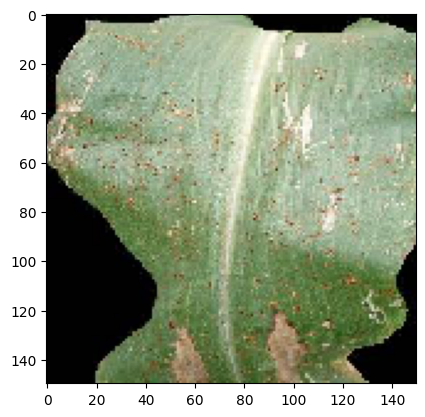

In [33]:
#test training
import numpy as np
import os
from tensorflow.keras.preprocessing import image
#file dari training/validation di tmp bisa "Copy path" disini untuk pengecekan
img_source = "/tmp/corn_disease/validation/karat/RS_Rust 1626.JPG"
image_load = image.load_img(img_source, target_size = (150,150))
imgplot = plt.imshow(image_load)
x = image.img_to_array(image_load)
x = np.expand_dims(x, axis=0)
probs = model.predict(x)

leafarray = np.argmax(probs)

if leafarray == 0:
  print("Bercak")
elif leafarray == 1:
  print("Hawar")
elif leafarray == 2:
  print("Karat")
else:
  print("Sehat")

print('Softmax Probabilities:')
print(probs)


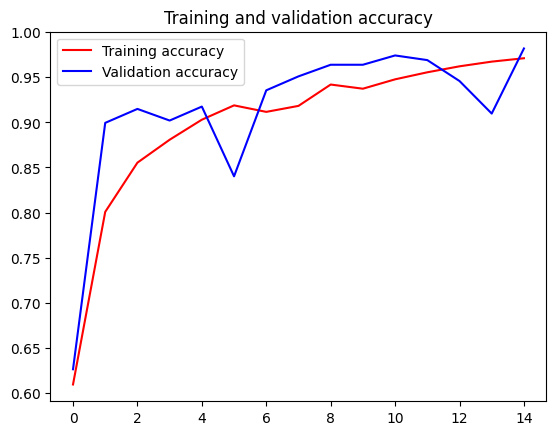

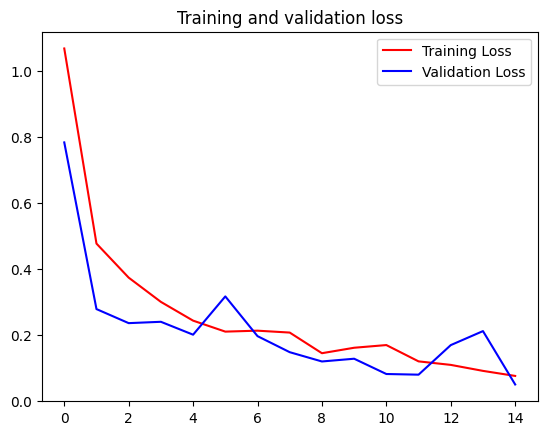

In [21]:
#plot chart akurasi training dan validasi

akurasi_train = history.history['accuracy']
akurasi_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(len(akurasi_train))

plt.plot(epochs, akurasi_train, 'r', label='Training accuracy')
plt.plot(epochs, akurasi_val, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_train, 'r', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#Save Model
Uncomment untuk save model dengan format yang diinginkan

In [37]:
# Save the entire model as a `.keras` zip archive.
# model akan di save di shared drive
# cek di shared drive udah ada atau belum supaya enggak double

#Format H5
#model.save('/content/drive/Shareddrives/Capstone C23-PC599/Machine Learning/my_model.h5')

#Format SavedModel
#model.save('/content/drive/Shareddrives/Capstone C23-PC599/Machine Learning/my_model')



#Convert to TFLite
Dont run cells above to save tflite format
* uncomment to convert

In [38]:
import pathlib

export_dir = '/content/drive/Shareddrives/Capstone C23-PC599/Machine Learning/tflite'

tf.saved_model.save(model, export_dir = export_dir)

#optimization

mode = ""

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

#Converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('/content/drive/Shareddrives/Capstone C23-PC599/Machine Learning/Convert')
tflite_model_file.write_bytes(tflite_model)

9500984